In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The problem we will solve is binary classification on 2D points. Our training data will consist of _m_ examples.

In [80]:
m = 1000
X = np.random.rand(2, m) * 2 - 1

The truth is that the class of our data points depends on whether or not they lie inside an ellipse, so let's define a couple of focal points and a distance.

In [81]:
f1 = np.array([[-0.55], [-0.2]])
f2 = np.array([[0.55], [0.35]])
d = 1.5

In [82]:
Y = np.sqrt(np.sum((X - f1)**2, axis=0, keepdims=True)) \
  + np.sqrt(np.sum((X - f2)**2, axis=0, keepdims=True)) < d

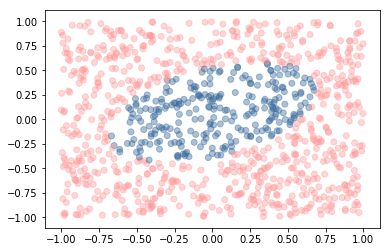

In [83]:
colors = ['#33669966' if y else '#FF999966' for y in Y[0]]
plt.scatter(X[0], X[1], color=colors)

In [84]:
# layer_dims = [2,5,3,1]
np.random.seed(0)
W1 = np.random.randn(5, 2)
b1 = np.zeros((5, 1))

W2 = np.random.randn(3, 5) * np.sqrt(2/5)
b2 = np.zeros((3, 1))

W3 = np.random.randn(1, 3) * np.sqrt(2/3)
b3 = np.zeros((1, 1))

In [85]:
def sigmoid(Z):
    Z[Z>20] = 20
    Z[Z<-20] = -20
    return 1/(1+np.exp(-Z))

In [86]:
def relu(Z):
    return np.maximum(0,Z)

In [87]:
learning_rate=0.07
num_iterations = 30000
costs = []
for i in range(0, num_iterations):

    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = relu(z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    cost = (1/m) * (-np.dot(Y, np.log(a3).T) - np.dot(1-Y, np.log(1-a3).T))

    dz3 = 1./m * (a3 - Y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims = True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims = True)

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    if i % 1000 == 0:
        print("Cost after iteration {}: {}".format(i, cost))
        costs.append(cost)

Cost after iteration 0: [[0.55715474]]
Cost after iteration 1000: [[0.10361939]]
Cost after iteration 2000: [[0.05672808]]
Cost after iteration 3000: [[0.04447343]]
Cost after iteration 4000: [[0.03849071]]
Cost after iteration 5000: [[0.03452989]]
Cost after iteration 6000: [[0.03162639]]
Cost after iteration 7000: [[0.02984411]]
Cost after iteration 8000: [[0.02855806]]
Cost after iteration 9000: [[0.02762673]]
Cost after iteration 10000: [[0.02692363]]
Cost after iteration 11000: [[0.02637356]]
Cost after iteration 12000: [[0.02592944]]
Cost after iteration 13000: [[0.02556187]]
Cost after iteration 14000: [[0.02525448]]
Cost after iteration 15000: [[0.02499061]]
Cost after iteration 16000: [[0.02475837]]
Cost after iteration 17000: [[0.02455147]]
Cost after iteration 18000: [[0.02436451]]
Cost after iteration 19000: [[0.02419387]]
Cost after iteration 20000: [[0.02403726]]
Cost after iteration 21000: [[0.0238934]]
Cost after iteration 22000: [[0.02375992]]
Cost after iteration 2300

In [88]:
m_new = 2000
np.random.seed(17)
X_new = np.random.rand(2, m_new) * 2 - 1
Y_new = np.sum((X_new - f1)**2, axis=0, keepdims=True) + np.sum((X_new - f2)**2, axis=0, keepdims=True) < d

z1 = np.dot(W1, X_new) + b1
a1 = relu(z1)
z2 = np.dot(W2, a1) + b2
a2 = relu(z2)
z3 = np.dot(W3, a2) + b3
a3 = sigmoid(z3)
Y_new_hat = a3

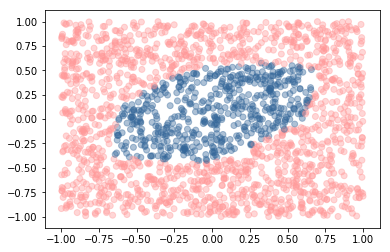

In [89]:
colors = ['#33669966' if y > 0.5 else '#FF999966' for y in Y_new_hat[0]]
plt.scatter(X_new[0], X_new[1], color=colors)

In [90]:
correct = np.sum((Y_new_hat > 0.5) == Y_new)
print('Got {} out of {} or {}%'.format(correct, m_new, correct/m_new*100))

Got 1803 out of 2000 or 90.14999999999999%
